# Initialize


In [130]:
# What version of Python do you have?
import sys

import pandas as pd
import sklearn as sk
import tensorflow as tf
from matplotlib import pyplot as plt


print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.8.0
Keras Version: 2.8.0

Python 3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) 
[Clang 6.0 (clang-600.0.57)]
Pandas 1.5.2
Scikit-Learn 1.1.3
GPU is NOT AVAILABLE


# Load Data

In [131]:
df = pd.read_csv('/Users/mervar/Library/CloudStorage/OneDrive-IndianaUniversity/cogs-q351/351_FinalProject/Data/cleaned.csv')

y = df.pop('median_house_value')

# Generate a subset for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Define and Compile Model

In [132]:
# Create a CNN model that trains on the data
def create_model():
    model = keras.Sequential([    
        keras.layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [133]:
# Train the data to use the df to predict y
model = create_model()
model.fit(df, y, epochs=50, verbose=0)

# Evaluate Performance

129/129 - 0s - loss: 0.1766 - mae: 0.2950 - mse: 0.1766 - 184ms/epoch - 1ms/step
Testing set Mean Abs Error:  0.29 MPG


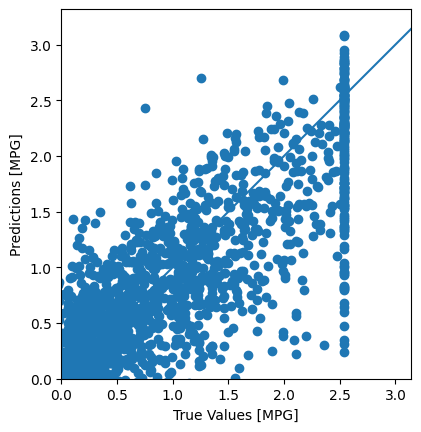

In [134]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

# Make predictions
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Create a linear regression

In [135]:
# complete a linear regression using the statsmodels library
import statsmodels.api as sm

# create a multivariate linear regression model of the data
# the dependent variable is the 'median_house_value' column
lm = sm.OLS(y, df)

# fit the model to the data
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3130.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:38:36   Log-Likelihood:                -18585.
No. Observations:               20640   AIC:                         3.720e+04
Df Residuals:                   20627   BIC:                         3.730e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude                     -0.4594      0.018    -26.092      0.000      -0.494      -0.425
latitude                      -0.4664      0.019    -25.200      0.000      -0.503      -0.430
housing_median_age             0.1154      0.005     24.205      0.000       0.106       0.125
total_rooms                   -0.0902      0.015     -6.186      0.000      -0.119      -0.062
total_bedrooms                 0.2626      0.022     12.080      0.000       0.220       0.305
population                    -0.3853      0.010    -36.896      0.000      -0.406      -0.365
households                     0.2549      0.022     11.490      0.000       0.211       0.298
median_income                  0.6384      0.005    116.635      0.000       0.628       0.649
ocean_proximity_<1H OCEAN      0.1072      0.007     14.790      0.000       0.093       0.121
ocean_proximity_INLAND        -0.2370      0.011    -21.579      0.000      -0.259      -0.216
ocean_proximity_ISLAND         1.4594      0.267      5.473      0.000       0.937       1.982
ocean_proximity_NEAR BAY       0.0752      0.015      5.048      0.000       0.046       0.104
ocean_proximity_NEAR OCEAN     0.1483      0.013     11.488      0.000       0.123       0.174
==============================================================================
Omnibus:                     5175.381   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19749.153
Skew:                           1.212   Prob(JB):                         0.00
Kurtosis:                       7.133   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Compare Model to LM

In [136]:
# Compute accuracy of the neural network
from sklearn.metrics import r2_score
print("Neural Network R2 Score: ", r2_score(y_test, test_predictions))
print("Linear Regression R2 Score: ", results.rsquared)

Neural Network R2 Score:  0.8205348090133537
Linear Regression R2 Score:  0.6454747751244776
